## <span style="color:#3399FF"> 1. 기초 통계 과제 </span>

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')

In [2]:
iris.info()

print(f"\niris의 구조는",iris.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB

iris의 구조는 (150, 5)


In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### [2. 기술통계량 산출]

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#### [3. 시각화]

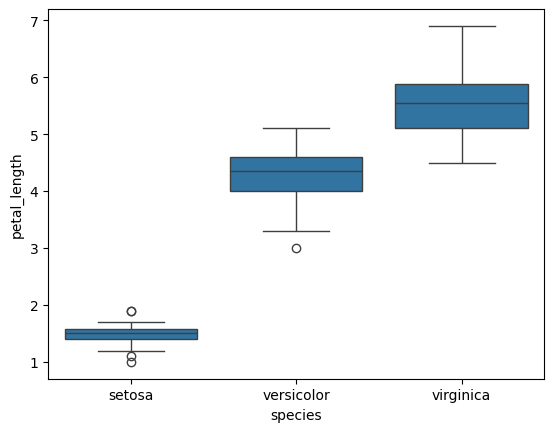

In [5]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.show()

[boxplot 해석 코멘트]

- virginica, versicolor, setosa 순으로 평균이 높고, petal_length의 분포 또한 비슷한 순으로 나타난다. species에 따라 petal length가 크게 차이나는 것을 확인할 수 있다. 

In [6]:
from scipy import stats

#### [4. 정규성 검정]

- Null Hypothesis : 각 species의 petal_length는 정규분포를 따른다. 
- Alternative Hypothesis : 각 species의 petal_length는 정규분포를 따르지 않는다. 

In [7]:
setosa_petal_length = iris[iris['species'] == 'setosa']['petal_length']
versicolor_petal_length = iris[iris['species'] == 'versicolor']['petal_length']
virginica_petal_length = iris[iris['species'] == 'virginica']['petal_length']

In [8]:
stat, p = stats.shapiro(setosa_petal_length)

print('setosa의 petal length에 대한 정규성 검정의 결과')
print('Test Statistics :', stat)
print('P-Value :', p)

if p>0.05:
    print("\np-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.")
else:
    print("\np-value가 0.05보다 작으므로, 귀무가설을 기각한다.")

setosa의 petal length에 대한 정규성 검정의 결과
Test Statistics : 0.9549767850318988
P-Value : 0.0548114671955363

p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.


In [9]:
stat, p = stats.shapiro(versicolor_petal_length)

print('versicolor의 petal length에 대한 정규성 검정의 결과')
print('Test Statistics :', stat)
print('P-Value :', p)

if p>0.05:
    print("\np-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.")
else:
    print("\np-value가 0.05보다 작으므로, 귀무가설을 기각한다.")

versicolor의 petal length에 대한 정규성 검정의 결과
Test Statistics : 0.96600440254332
P-Value : 0.15847783815657573

p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.


In [10]:
stat, p = stats.shapiro(virginica_petal_length)

print('virginica의 petal length에 대한 정규성 검정의 결과')
print('Test Statistics :', stat)
print('P-Value :', p)

if p>0.05:
    print("\np-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.")
else:
    print("\np-value가 0.05보다 작으므로, 귀무가설을 기각한다.")

virginica의 petal length에 대한 정규성 검정의 결과
Test Statistics : 0.9621864428612802
P-Value : 0.10977536903223506

p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.


#### [5. 등분산성 검정]

- Null Hypothesis : 세 species의 petal_length는 등분산성을 따른다.
- Alternative Hypothesis : 세 species의 petal_length는 등분산성을 따르지 않는다.

In [11]:
from scipy.stats import levene

In [12]:
stat, p = levene(setosa_petal_length, versicolor_petal_length, virginica_petal_length)

print('petal length에 대한 등분산성 검정의 결과')
print('Test Statistics :', stat)
print('P-Value :', p)

if p>0.05:
    print("\n귀무가설을 기각할 수 없다.")
else:
    print("\n귀무가설을 기각한다.")

petal length에 대한 등분산성 검정의 결과
Test Statistics : 19.480338801923573
P-Value : 3.1287566394085304e-08

귀무가설을 기각한다.


#### [6. 가설 수립]

- Null Hypothesis : 3개 Species간 petal_length의 평균이 모두 같다.
- Alternative Hypothesis : 세 species의 petal_length이 평균이 다르다.

#### [7. ANOVA 실행]

In [13]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm, anova_single

In [14]:
model = ols('petal_length ~ C(species)', iris).fit()

anova_table = anova_lm(model)

print(anova_table)

               df    sum_sq     mean_sq            F        PR(>F)
C(species)    2.0  437.1028  218.551400  1180.161182  2.856777e-91
Residual    147.0   27.2226    0.185188          NaN           NaN


In [15]:
stat = anova_table['F'].iloc[0]
p = anova_table['PR(>F)'].iloc[0]

print('petal length에 대한 일원분산분석의 결과')
print("F Statistics :", stat)
print("P-value :", p)

if p>0.05:
    print("\n귀무가설을 기각할 수 없다.")
else:
    print("\n귀무가설을 기각한다.")

petal length에 대한 일원분산분석의 결과
F Statistics : 1180.1611822529753
P-value : 2.856776610962552e-91

귀무가설을 기각한다.


#### [8. 사후검정]

In [16]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [17]:
hsd = pairwise_tukeyhsd(iris['petal_length'], iris['species'], alpha=0.05)

hsd.summary()
hsd_table = pd.DataFrame(hsd.summary().data[1:], columns=hsd.summary().data[0])
hsd_table

,group1,group2,meandiff,p-adj,lower,upper,reject
0,setosa,versicolor,2.798,0.0,2.5942,3.0018,True
1,setosa,virginica,4.090,0.0,3.8862,4.2938,True
2,versicolor,virginica,1.292,0.0,1.0882,1.4958,True


In [20]:
for i in range(3):
    if hsd_table['reject'].loc[i]:
        print(hsd_table['group1'].loc[i],'와',hsd_table['group2'].loc[i],'사이의 평균은 유의미하게 다릅니다.')

setosa 와 versicolor 사이의 평균은 유의미하게 다릅니다.
setosa 와 virginica 사이의 평균은 유의미하게 다릅니다.
versicolor 와 virginica 사이의 평균은 유의미하게 다릅니다.


#### [9. 결과 요약]

boxplot에서 시각적으로 세 species의 petal_length 평균이 다르다는 것을 확인하였다. 

ANOVA에서 평균이 모두 같지 않다는 것을 통계적으로 확인하였고, 사후검정을 통해 2개씩 비교하였을 때도 모두 서로 평균이 다르다는 것을 확인하였다. 

따라서 boxplot에서 확인한 것을 바탕으로, virginica, versicolor, setosa 순으로 평균이 높다고 할 수 있다. 

------------------------------------------------------------------------------

## <span style="color:#3399FF"> 2. 기초 머신러닝 과제 </span>

In [84]:
from sklearn.model_selection import train_test_split

#### [1. 데이터 로드 및 기본 탐색]

In [85]:
df = pd.read_csv(r'C:\Users\rosie\Desktop\Hienthoo\연세대\ybigta\0715 과제\creditcard.csv')

In [86]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [87]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [89]:
print("Class 개수")
print(df['Class'].value_counts())
print("Class 비율")
print(df['Class'].value_counts(normalize=True))

Class 개수
Class
0    284315
1       492
Name: count, dtype: int64
Class 비율
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


#### [2. 샘플링]

In [90]:
df0 = df[df['Class']==0] #class=0인 데이터만 분리
df1 = df[df['Class']==1] #class=1인 데이터만 분리
df0_sample = df0.sample(10000, random_state = 42) #class=0인 데이터 중 10,000건 무작위 샘플링, random_state=42
df2 = pd.concat([df0_sample, df1]) #df2에 df1과 sampling 데이터 합치기.

In [91]:
df2.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [92]:
print("Class 개수")
print(df2['Class'].value_counts())
print("Class 비율")
print(df2['Class'].value_counts(normalize=True))

Class 개수
Class
0    10000
1      492
Name: count, dtype: int64
Class 비율
Class
0    0.953107
1    0.046893
Name: proportion, dtype: float64


#### [3. 데이터 전처리]
전처리를 위한 평균과 표준편차 계산 후 새로운 변수 생성, 기존 변수 제거

In [93]:
amount_mean = df2['Amount'].mean()
amount_std = df2['Amount'].std()

print(f"평균은 {amount_mean}, 표준편차는 {amount_std}")

평균은 88.04534502478079, 표준편차는 223.1078259420617


In [94]:
df2['Amount_Scaled'] = (df2['Amount']-amount_mean) / amount_std

In [95]:
df2 = df2.drop('Amount', axis=1)

In [96]:
# X, y로 데이터프레임 분리
X = df2.drop('Class', axis=1)
Y = df2['Class']

#### [4. 학습 데이터와 테스트 데이터 분할]

In [97]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42, stratify=Y)

In [98]:
print("Class 개수")
print(Y_train.value_counts())
print("Class 비율")
print(Y_train.value_counts(normalize=True))

Class 개수
Class
0    7999
1     394
Name: count, dtype: int64
Class 비율
Class
0    0.953056
1    0.046944
Name: proportion, dtype: float64


In [99]:
print("Class 개수")
print(Y_test.value_counts())
print("Class 비율")
print(Y_test.value_counts(normalize=True))

Class 개수
Class
0    2001
1      98
Name: count, dtype: int64
Class 비율
Class
0    0.953311
1    0.046689
Name: proportion, dtype: float64


#### [5. SMOTE 적용]

In [100]:
from imblearn import over_sampling
from imblearn.over_sampling import SMOTE

In [101]:
print("Class 개수")
print(Y_train.value_counts())

Class 개수
Class
0    7999
1     394
Name: count, dtype: int64


학습 데이터(X_train)에 SMOTE를 적용하여 소수 클래스를 오버샘플링했다. 
Y_train에서 Class 비율이 95:5로 큰 차이가 있기 때문에, 소수 클래스(1)에 대해 오버샘플링을 하여 사기 거래 건수를 추가로 만들어준다. 

In [102]:
new_X_train, new_Y_train = SMOTE().fit_resample(X_train, Y_train)

In [103]:
print("Class 개수")
print(new_Y_train.value_counts())

Class 개수
Class
0    7999
1    7999
Name: count, dtype: int64


오버샘플링 후, 두 클래스의 데이터 수가 동일하게 조정된 것을 확인할 수 있다. 

#### [6. 모델 학습]

In [104]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid = {'C' : [0.01, 0.1, 1, 10, 100],
              'solver': ['1bfgs', 'liblinear'],
              'max_iter' : [100, 300, 1000]}

grid = GridSearchCV(LogisticRegression(), param_grid, scoring='f1', cv=5, n_jobs=-1)

grid.fit(new_X_train, new_Y_train)

c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
75 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
17 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1160, in fit
    self._validate_params()
  File "c:\Users\rosie\anaconda3\Lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\rosie\anaconda3\Lib\site

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 300, 1000],
                         'solver': ['1bfgs', 'liblinear']},
             scoring='f1')

In [106]:
best_model = grid.best_estimator_

In [107]:
Y_proba2 = best_model.predict_proba(X_test)
Y_pred_custom2 = (Y_proba2[:,1] >= threshold).astype(int)

print(classification_report(Y_test, Y_pred_custom2))

pr_auc2 = average_precision_score(Y_test, Y_proba2[:, 1])
print("\nPR-AUC (Average Precision Score):", pr_auc2)

report2 = classification_report(Y_test, Y_pred_custom2, output_dict = True)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.85      0.86      0.85        98

    accuracy                           0.99      2099
   macro avg       0.92      0.92      0.92      2099
weighted avg       0.99      0.99      0.99      2099


PR-AUC (Average Precision Score): 0.9022282785795426


In [108]:
model = LogisticRegression()
model.fit(new_X_train, new_Y_train)

LogisticRegression()

In [109]:
new_Y_pred = model.predict(new_X_train)
print("예측값:", new_Y_pred)
new_Y_proba = model.predict_proba(new_X_train)
print("예측확률:\n", new_Y_proba)

예측값: [0 0 0 ... 1 1 1]
예측확률:
 [[9.47324133e-01 5.26758669e-02]
 [9.69993960e-01 3.00060400e-02]
 [8.03668222e-01 1.96331778e-01]
 ...
 [1.89182003e-11 1.00000000e+00]
 [2.46839021e-01 7.53160979e-01]
 [2.44132702e-08 9.99999976e-01]]


In [110]:
from sklearn.metrics import classification_report

print(classification_report(new_Y_train, new_Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      7999
           1       0.97      0.95      0.96      7999

    accuracy                           0.96     15998
   macro avg       0.96      0.96      0.96     15998
weighted avg       0.96      0.96      0.96     15998



In [111]:
from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(new_Y_train, new_Y_proba[:, 1])
print("PR-AUC (Average Precision Score):", pr_auc)

PR-AUC (Average Precision Score): 0.9887993590950033


#### [7. 최종 성능 평가]

In [112]:
threshold = 0.675

Y_pred_custom = (Y_proba[:,1] >= threshold).astype(int)
print("예측값:", Y_pred)
Y_proba = model.predict_proba(X_test)
print("예측확률:\n", Y_proba)

from sklearn.metrics import classification_report

print(classification_report(Y_test, Y_pred_custom))

from sklearn.metrics import average_precision_score

pr_auc = average_precision_score(Y_test, Y_proba[:, 1])
print("\nPR-AUC (Average Precision Score):", pr_auc)

예측값: [0 0 0 ... 0 0 0]
예측확률:
 [[0.85211256 0.14788744]
 [0.89169716 0.10830284]
 [0.9908313  0.0091687 ]
 ...
 [0.90190284 0.09809716]
 [0.95868606 0.04131394]
 [0.98116827 0.01883173]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2001
           1       0.67      0.86      0.75        98

    accuracy                           0.97      2099
   macro avg       0.83      0.92      0.87      2099
weighted avg       0.98      0.97      0.98      2099


PR-AUC (Average Precision Score): 0.8807475462603929


In [113]:
report = classification_report(Y_test, Y_pred_custom, output_dict = True)

if  report['weighted avg']['recall']>= 0.8 :
    print('Recall 목표 통과')

if  report['weighted avg']['f1-score']>= 0.8 :
    print('f1-score 목표 통과')

if  pr_auc >= 0.9 :
    print('PR-AUC 목표 통과')

Recall 목표 통과
f1-score 목표 통과


-- GridSearch --

In [114]:
if  report2['weighted avg']['recall']>= 0.8:
    print('Recall 목표 통과')

if  report2['weighted avg']['f1-score']>= 0.8:
    print('f1-score 목표 통과')

if  pr_auc2 >= 0.9 :
    print('PR-AUC 목표 통과')

Recall 목표 통과
f1-score 목표 통과
PR-AUC 목표 통과


GridSearch를 이용한 결과 최종적으로 모든 목표를 통과하였다. 